In [243]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *
import itertools

# Get Data 
---

In [244]:
#XVS/USDT_2024_30m & QI/USDT_2024_30m

In [245]:
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)


In [246]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [247]:
#XVS/USDT_2024_30m & QI/USDT_2024_30m


crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

cointegrated_pairs = [(crypto_1,
  crypto_2,
  0.731393,
  0.8501886494196308,
  0.22)]

In [248]:
#Params:
window_size = 1440
entry_threshold= 2
exit_threshold=0
stop_loss_threshold= 4

In [249]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits, price_changes_S1, price_changes_S2 = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)




Testing strategy on pair: BTCEUR_2023_1m and BTCGBP_2023_1m ...
Total trades closed: 450 (Wins=409, Losses=41)
Win rate: 0.91


In [250]:
# plt.hist(zscore_series, bins=50)

In [251]:
# #Compute normalised difference between the two prices
# normalised_abs_diff = np.abs((S1 - S2) / (S1 + S2))

# #Compute the average normalised difference
# np.mean(normalised_abs_diff)

In [252]:
# #SETH and ETH Distance: 0.0003968226419110906

# s_eth_distance = 0.0003968226419110906
# w_bitcoin_distance = 0.0006442955592394416

# percentage = s_eth_distance/w_bitcoin_distance * 100
# percentage


In [253]:
# sym1

In [254]:
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# len(price_changes_S2_non_zero)

In [255]:
S1

timestamp
2023-10-01 00:00:00    25534.42
2023-10-01 00:01:00    25529.86
2023-10-01 00:02:00    25528.72
2023-10-01 00:03:00    25528.31
2023-10-01 00:04:00    25535.11
                         ...   
2023-11-30 23:55:00    34647.48
2023-11-30 23:56:00    34649.59
2023-11-30 23:57:00    34646.25
2023-11-30 23:58:00    34646.24
2023-11-30 23:59:00    34650.78
Name: BTCEUR_2023_1m, Length: 87840, dtype: float64

In [273]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Total trades: 450
Number of profitable trades (proft > 0): 392
Number of non-profitable trades (proft < 0): 58
Total return €: 2286.53
Total return %: 22.87%
Long spread losses: 25, Short spread losses: 33
Number of Dual-leg profitable trades: 156


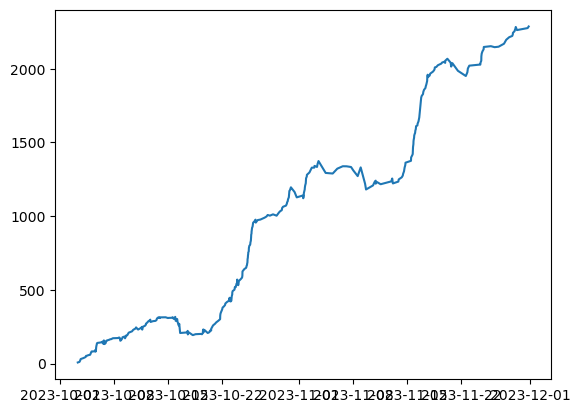

In [257]:
plt.plot(cumulative_profit_series)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  2.,  2.,  1.,
         2.,  6.,  5.,  3.,  3.,  6.,  2.,  2.,  2.,  2.,  4.,  3.,  2.,
        20., 32., 37., 40., 66., 61., 40., 41., 23., 10.,  8.,  4.,  2.,
         1.,  1.,  2.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-110.23175459, -108.53980229, -106.84784998, -105.15589767,
        -103.46394537, -101.77199306, -100.08004075,  -98.38808845,
         -96.69613614,  -95.00418383,  -93.31223153,  -91.62027922,
         -89.92832691,  -88.23637461,  -86.5444223 ,  -84.85246999,
         -83.16051769,  -81.46856538,  -79.77661307,  -78.08466077,
         -76.39270846,  -74.70075615,  -73.00880385,  -71.31685154,
         -69.62489923,  -6

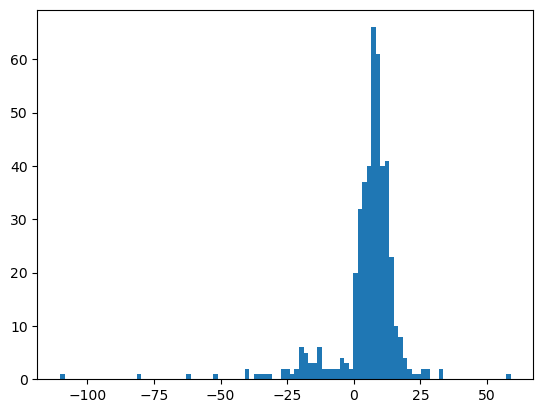

In [258]:
plt.hist(trade_profits, bins=100)

In [259]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -20.017289749331184
Average trade win:  € 8.794721592649603
Number of negative profits(profits that were less than the transaction cost):  58
Number of positive profits (profits that were greater than the transaction cost):  392


In [260]:
# #Calculate returns based on the trade profits
# trade_profits = np.array(trade_profits)
# returns = trade_profits/initial_capital * 100

# #Plot the returns
# plt.hist(returns, bins=50, edgecolor='black')
# plt.xlabel('Returns (%)')   
# plt.ylabel('Frequency')
# plt.title(f'Returns Distribution for Pair {sym1} and {sym2}') 

In [261]:
# #Calculate percentage price changes for each asset
# price_changes_S1 = np.array(price_changes_S1)

In [262]:
# #Obtain non-zero price changes
# price_changes_S1_non_zero = [x for x in price_changes_S1 if x != 0]
# price_changes_S2_non_zero = [x for x in price_changes_S2 if x != 0]

# #Convert price changes to percentage
# price_changes_S1_non_zero_percent = [(x*100) for x in price_changes_S1_non_zero]
# price_changes_S2_non_zero_percent = [(x*100) for x in price_changes_S2_non_zero]

# #Print average price changes
# print(f"Average price change S1: {np.mean(price_changes_S1_non_zero_percent)} %", f"Average price change S1: {np.mean(price_changes_S2_non_zero_percent)} %")
# print(f"Number of trades: {len(price_changes_S1_non_zero)}")

In [263]:
# percentage_return = cumulative_profit_series[-1]/initial_capital * 100
# print(f"Percentage return: {percentage_return:.2f} %")


# #PROFIT SHOULD BE 0.15 EUR

# plt.figure(figsize=(10,6))
# plt.plot(cumulative_profit_series)
# plt.title('Cumulative PnL')
# plt.xlabel('Time')
# plt.ylabel('PnL (EUR)')
# plt.show()

Number of trade entries: 4
Number of trade exits: 4
Total paired trades: 4
Trades in window:
Trade 1 : 2023-10-03 05:06:00 to 2023-10-03 06:38:00 (win)
Trade 2 : 2023-10-03 07:16:00 to 2023-10-03 11:58:00 (win)
Trade 3 : 2023-10-03 14:05:00 to 2023-10-03 14:18:00 (win)
Trade 4 : 2023-10-03 15:37:00 to 2023-10-03 15:39:00 (win)


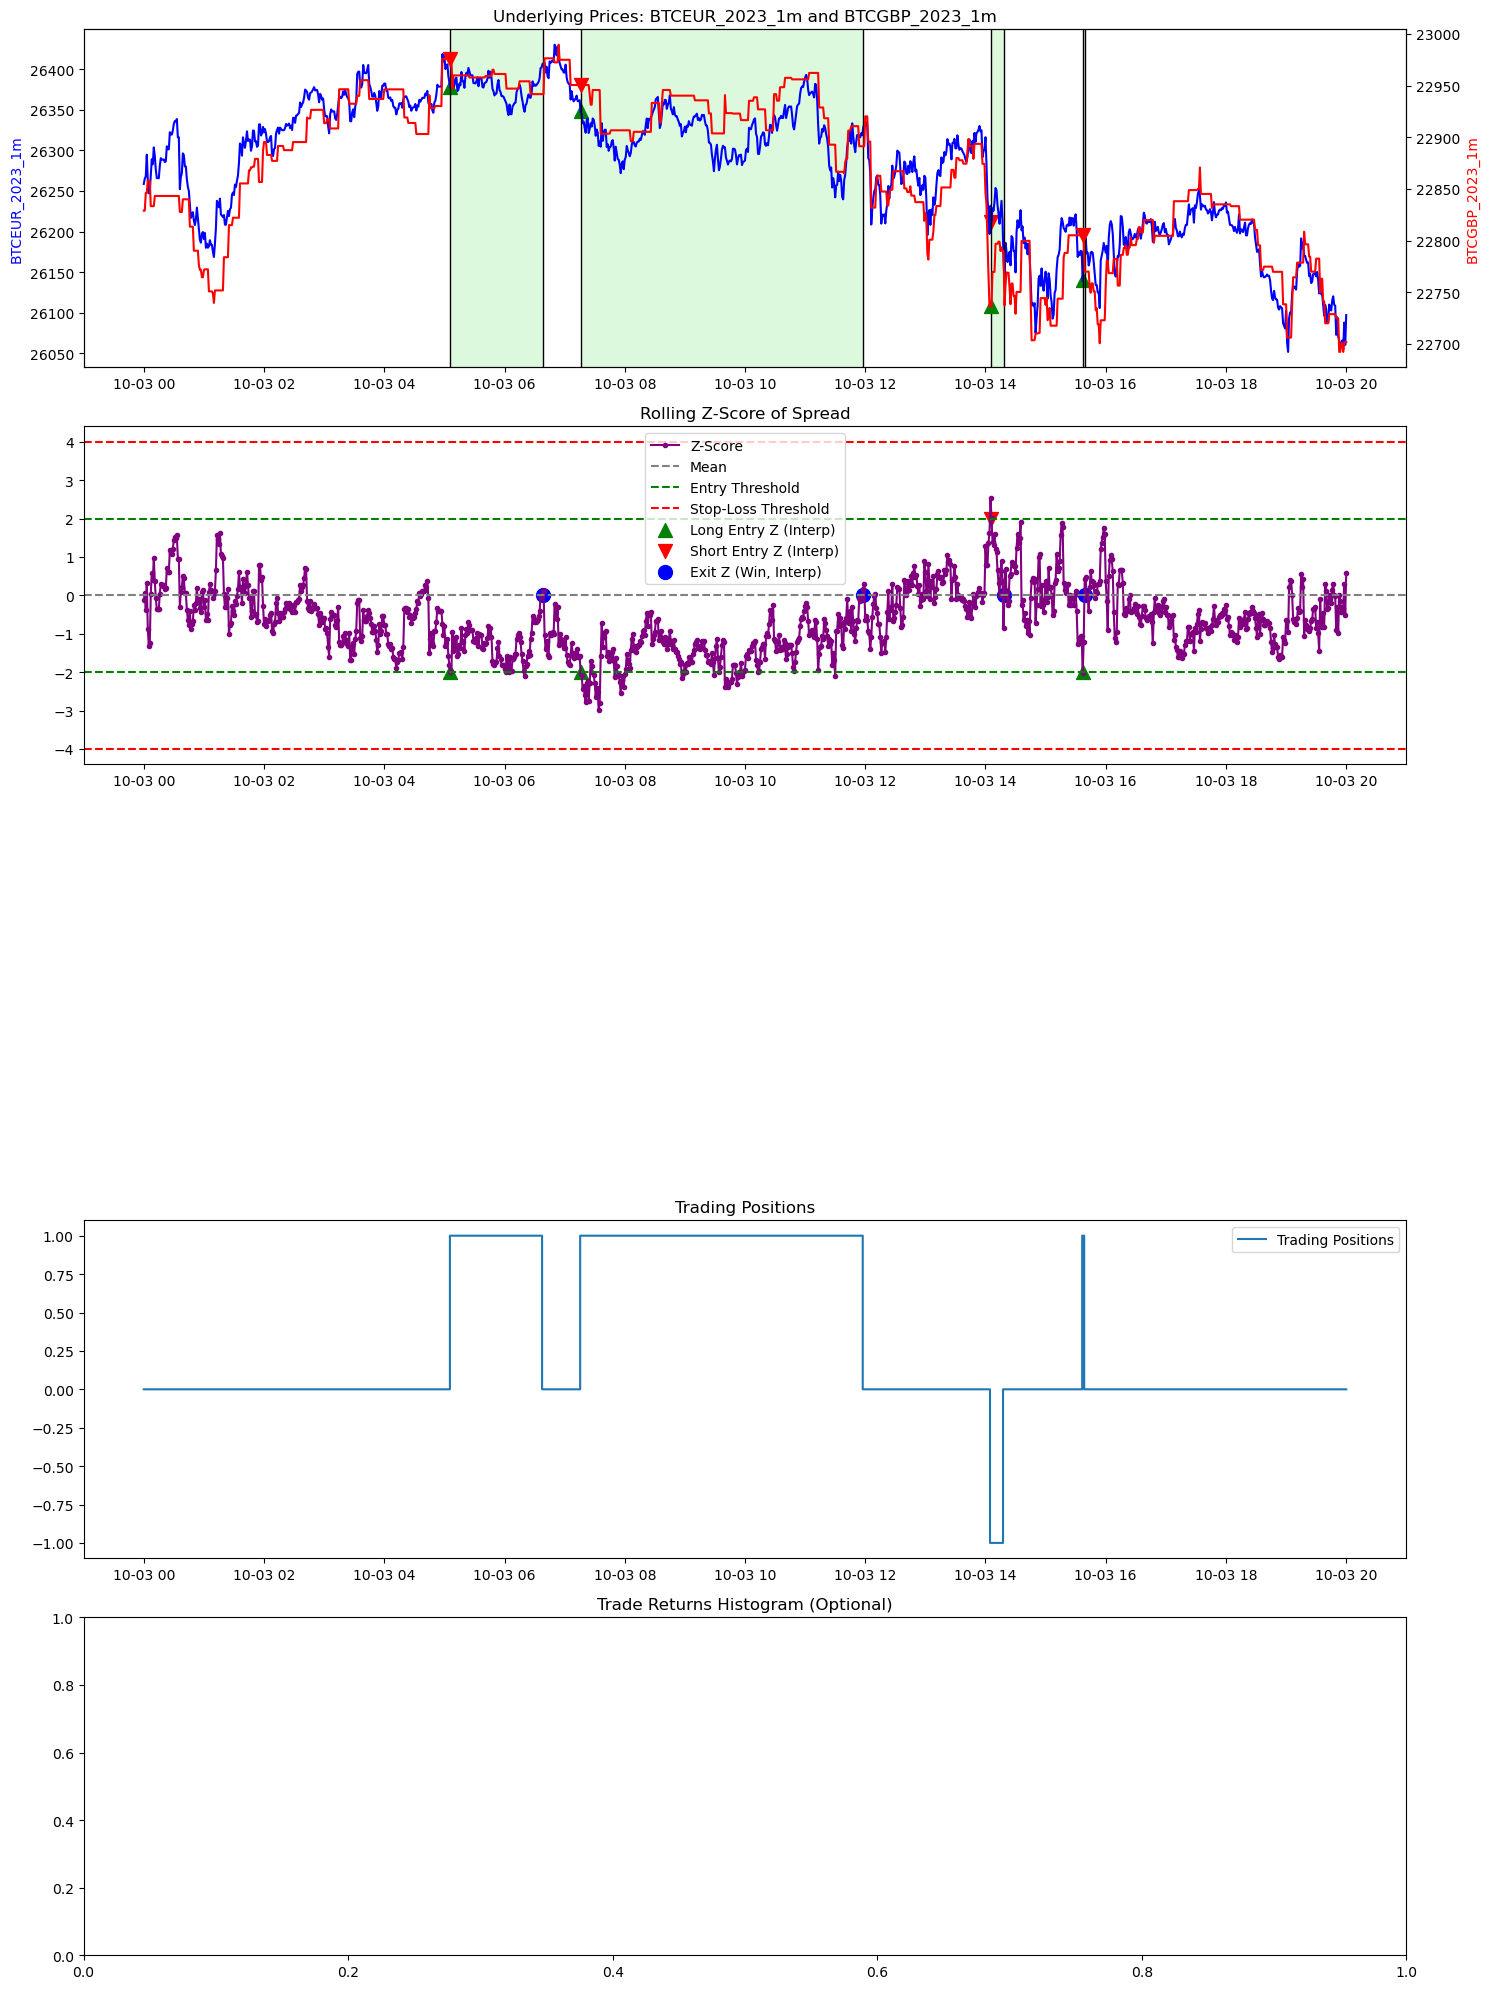

In [269]:
#Plot trading simulation
window_start = pd.to_datetime('2023-10-03 00:00:00')
window_end = pd.to_datetime('2023-10-03 20:00:00')


# window_start = pd.to_datetime('2024-03-05 08:00:00')
# window_end = pd.to_datetime('2024-03-08 15:00:00')

# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



In [265]:
z = 0.1

if z < -0:
    print("Short")

In [266]:


#Get prices at the start and end of the first trade
S1_price_start = S1[entry_indices]
S2_price_start = S2[entry_indices]

S1_price_end = S1.loc[exit_indices]
S2_price_end = S2.loc[exit_indices]


#Calculate the price changes by converting the series to numpy arrays
S1_price_start = S1_price_start.to_numpy()
S2_price_start = S2_price_start.to_numpy()

S1_price_end = S1_price_end.to_numpy()
S2_price_end = S2_price_end.to_numpy()

print("BEFORE ALIGNMENT")

#Make sure the arrays have the same shape
print(S1_price_start.shape)
print(S2_price_start.shape)


print(S1_price_end.shape)
print(S2_price_end.shape)


if S1_price_start.shape > S1_price_end.shape:
    S1_price_start = S1_price_start[:len(S1_price_end)]

if S2_price_start.shape > S2_price_end.shape:
    S2_price_start = S2_price_start[:len(S2_price_end)]
 
print("AFTER ALIGNMENT")

#Make sure the arrays have the same shape
print(S1_price_start.shape)
print(S2_price_start.shape)

print(S1_price_end.shape)
print(S2_price_end.shape)

#Get the price changes
S1_price_change = S1_price_end - S1_price_start
S2_price_change = S2_price_end - S2_price_start

#Get percentage price changes
S1_price_change_percent = S1_price_change/S1_price_start * 100
S2_price_change_percent = S2_price_change/S2_price_start * 100

#Get absolute percentage price changes
S1_price_change_percent_abs = np.abs(S1_price_change_percent)
S2_price_change_percent_abs = np.abs(S2_price_change_percent)



# #Get the price changes
# S1_price_change = S1_price_end - S1_price_start
# S2_price_change = S2_price_end - S2_price_start


NameError: name 'entry_indices' is not defined

In [81]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------

print(f"Average absolute S1 price change percent: {np.mean(S1_price_change_percent_abs):.2f}%")
print(f"Average absolute S2 price change percent: {np.mean(S2_price_change_percent_abs):.2f}%")

print(f"Average of average absolute price changes: {(np.mean(S1_price_change_percent_abs) + np.mean(S2_price_change_percent_abs))/2:.2f}%")


Average absolute S1 price change percent: 0.67%
Average absolute S2 price change percent: 0.70%
Average of average absolute price changes: 0.69%
